In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization,Conv2D,MaxPool2D,AveragePooling2D,Dropout,Activation,Input,concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [14]:

def resolution_block(input_layer,n_convs,filters,kernel_size,padding = 'same',kernel_initializer = 'glorot_uniform',
                     batch_norm = False,dropout = None,activation = 'relu'):
    '''
    Create a fully convolutional block with parameters
    inputs :
        n_convs : number of convolutional layers
        
    outputs:
        convs : 
    '''
    x = input_layer
    for i in range(n_convs):
        x = Conv2D(filters= filters,
                   kernel_size = kernel_size ,
                   padding=padding,
                   kernel_initializer=kernel_initializer )(x)
        if batch_norm :
            x = BatchNormalization()(x)
        x = Activation('relu')(x)  
    if dropout : 
        x = Dropout(dropout)(x)
            
    
    return x


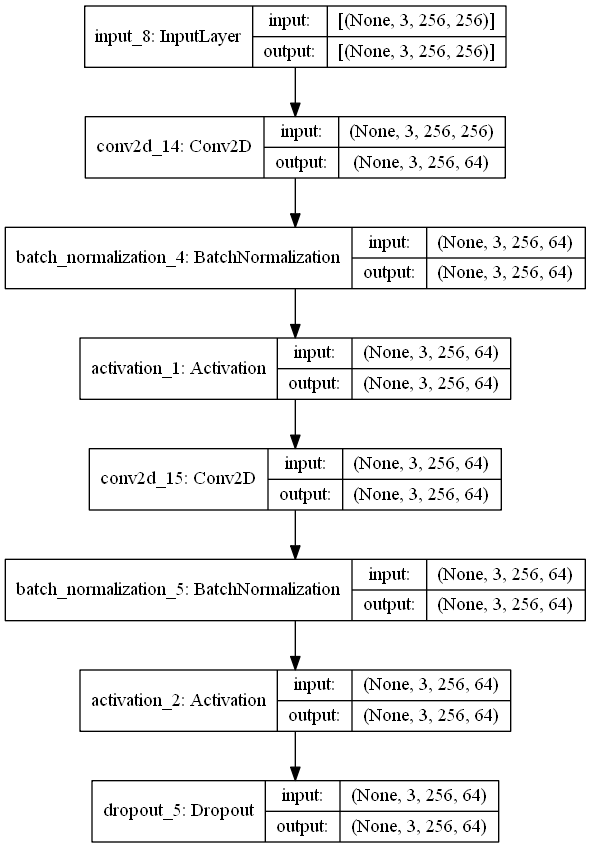

In [15]:
input_layer = Input(shape = (3,256,256))

layers = resolution_block(input_layer,2,filters= 64,kernel_size=3,dropout=0.2,batch_norm=True)

model = Model(inputs = input_layer,outputs= layers)


plot_model(model,show_shapes = True)